In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster,datasets,mixture
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

# Exercise 1

**Spectral clustering** is a technique used for clustering data points into groups or clusters based on their similarity. It leverages the spectral properties of a similarity or affinity matrix derived from the data to partition it into meaningful clusters. This technique is particularly useful when dealing with non-convex or complex-shaped clusters that may be challenging for traditional clustering algorithms like k-means. It is also suitable to handle complex cluster shapes. Something to remark is its robustness to noise and outliers, and its ability to work with any similarity measure. However, it also has some limitations, such as the need to choose the number of clusters (k) in advance and the computational complexity, especially in high-dimensional data.


![Alt Text](Spectral_clustering.png)


Here is the algorithm that describes how spectral clustering works and what are the mathematical principles involved:

1. **Similarity Matrix**: Given a dataset with n data points, a similarity matrix (also called an affinity matrix) is constructed. This matrix quantifies the pairwise similarity between data points. Common similarity measures include Gaussian similarity (based on the Euclidean distance between data points), cosine similarity, or any other similarity metric appropriate for the specific problem.

2. **Graph Representation**: The similarity matrix is used to build a weighted graph, where each data point corresponds to a node in the graph, and the similarity between data points determines the edge weights. Typically, if two data points are very similar, their edge weight is high, and if they are dissimilar, the edge weight is low or zero.

3. **Spectral Decomposition**: The Laplacian matrix of the graph is computed. The Laplacian matrix describes the graph's structure and is derived from the adjacency matrix (based on edge weights). There are different types of Laplacian matrices, but the most commonly used ones are the unnormalized Laplacian, normalized Laplacian, and the symmetric normalized Laplacian.

4. **Eigenvalue Decomposition**: The Laplacian matrix is then decomposed into its eigenvalues and corresponding eigenvectors. These eigenvectors capture the graph's structural information and contain information about how data points are connected in the graph.

5. **Dimension Reduction**: Typically, only the eigenvectors corresponding to the smallest eigenvalues are retained. The number of eigenvectors to keep can be determined through various methods, including the Elbow method or by specifying the desired number of clusters.

6. **Clustering**: The retained eigenvectors are used as features for a subsequent clustering algorithm, often k-means. This step assigns data points to clusters based on the low-dimensional representation of the data obtained from the eigenvectors.

Finally, there is a relationship between spectral clustering and dimensionality reduction. While spectral clustering and dimensionality reduction are related through the dimensionality reduction step in spectral clustering, they serve different primary purposes. Spectral clustering focuses on clustering data points based on similarity, whereas dimensionality reduction techniques aim to reduce the feature space's dimensionality for various purposes, including visualization and feature selection.

# Exercise 2

**DBSCAN** stands for Density-Based Spatial Clustering of Applications with Noise. It is a clustering technique based on density rather than distances, as seen in methods like k-means or k-medoids. The fundamental principle of DBSCAN asserts that a cluster should exhibit a higher density than its surroundings. The main concept behind this method is that each point should have a minimum number of neighbors or nearby points to be considered part of a cluster. The algorithm requires two key parameters: epsilon and minimum points. A very small epsilon can result in the algorithm taking too much time to converge, while a very large epsilon may cause the algorithm to never converge.

This method is commonly used under the following circumstances:

* When the number of required clusters is unknown
* When outliers or noise are present in the dataset
* When the shape and size of clusters are arbitrary

![Alt Text](Image_DBSCAN.png)

The mathematical principles behind DBSCAN are:

* **Density Reachability**: DBSCAN defines clusters based on the density of data points. A data point is considered to be in the same cluster as another if it is density-reachable from that point. Density reachability is determined by comparing the distance between data points and a specified neighborhood radius (epsilon or ε). If the distance between two points is less than ε, they are considered neighbors.

* **Core Points**: In DBSCAN, core points are data points that have at least a specified minimum number of neighbors within the epsilon radius (minPts). Core points are considered the central points of clusters because they have sufficient local density.

* **Border Points**: Border points are data points that are within the epsilon radius of a core point but do not have enough neighbors to be core points themselves. Border points are part of a cluster but are not as dense as core points.

* **Noise Points**: Noise points are data points that are neither core points nor border points. They are typically isolated and do not belong to any cluster. DBSCAN is robust to noise in the data.

* **Direct Density-Based Clustering**: DBSCAN clusters data points by directly connecting dense regions of points. It identifies clusters as groups of connected core points and their border points.

* **Connected Components**: DBSCAN employs graph theory concepts to identify clusters. It uses connected components in a graph to represent clusters, where core points are connected by edges.

* **Transitivity**: The transitivity property of connectedness is used to establish the relationship between core points. If point A is density-reachable from point B, and point B is density-reachable from point C, then point A is also density-reachable from point C.

* **Reachability Connectivity**: The reachability distance, which is the minimum distance required for one point to be density-reachable from another, is crucial in determining the structure of clusters.

These mathematical concepts and principles allow DBSCAN to discover clusters of varying shapes and sizes based on the local density of data points. It is a powerful algorithm for clustering spatial data and is particularly useful when dealing with datasets where traditional distance-based clustering methods may not perform well.

Finally, it is important to establish that DBSCAN and Spectral Clustering are fundamentally different algorithms, they can be related in the sense that DBSCAN can be used as a preliminary step to create a similarity graph, which can then be processed by Spectral Clustering. This combination may be useful in situations where DBSCAN can effectively identify dense regions, and Spectral Clustering can further refine the clustering based on the graph structure. However, it's important to note that this relationship is not a strict dependency, and both algorithms can be used independently for different clustering tasks.

# Exercise 3

**The elbow method** is a heuristic used to determine the optimal number of clusters for a clustering algorithm. It involves plotting the explained variance or some other measure of clustering quality as a function of the number of clusters and looking for a point in the plot where adding more clusters does not significantly improve the quality of the clustering.


![Alt Text](Elbow.png)


Elbow method has several limitations and flaws like:

* **Subjectivity:** The choice of the elbow point is somewhat subjective, and different analysts may interpret the plot differently. What appears as an "elbow" to one person might not be the same for another.
* **Lack of Clarity:** In some cases, the elbow point may not be clearly defined, making it challenging to determine the optimal number of clusters. The curve may not exhibit a distinct bend or elbow shape.
* **Sensitivity to Data Distribution:** The elbow method assumes that clusters have similar shapes and densities. If the data contains clusters with different shapes or varying densities, the elbow method may not work well.
* **Dependent on the Clustering Metric:** The choice of clustering quality measure can impact the results. Different metrics may lead to different elbow points, making it necessary to try multiple metrics.
* **May Not Detect Complex Structures:** The elbow method is not suitable for datasets with complex or hierarchical cluster structures, as it tends to favor simple, well-separated clusters.
* **Limited to Partitional Clustering:** The elbow method is primarily designed for partitional clustering algorithms like K-means and may not work well for other clustering techniques like hierarchical or density-based clustering.
* **Arbitrary Range Selection:** Determining the range of candidate cluster numbers is arbitrary and can influence the results. Different ranges may lead to different conclusions about the optimal number of clusters.

To address these limitations, it's often recommended to use multiple methods for estimating the optimal number of clusters, such as silhouette analysis, gap statistics, or dendrogram inspection (for hierarchical clustering). Additionally, domain knowledge and the specific goals of your analysis should also guide the choice of the number of clusters.

# Exercise 4

In order to implement the python package for k-means, let's take a look of the KMeans_class that we created base on the pseudocode of the algorithm:

```python

```python 

import numpy as np

class KMeans_class:

    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        self.X = X
        self.centroids = X[np.random.choice(range(len(X)), self.n_clusters, replace=False)]

        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            self.labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1)

            # Update centroids as the mean of the data points in each cluster
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.n_clusters)])

            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

    def transform(self, X):
        # Assign data points to the nearest centroids
        return np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1)

    def fit_transform(self, X):
        self.fit(X)
        return self.labels

    def predict(self, X):
        return self.transform(X)
    
    def fit_predict(self, X):
        self.fit(X)
        return self.labels

Once we have created the python class for kmeans, we have to follow the next structure to implement the package:

```python 

mykmeans
l--mykmeans
    l--__init__.py
    l--kmeans.py
l--setup.py

In this structure, mykmeans is the outler folder of the python package, and inside of it, we have another mykmeans folder that contains the __init__.py file and the kmeans.py file. The __init__.py file is used to indicate to Python that this directory should be treated as a package. The kmeans.py file contains the KMeans_class that we created before. Finally, the setup.py file is used to build and install the package.



Now let's take a look to the class we developed for kmeoids algorithm:

```python

import numpy as np

class KMeoids_class:

    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        self.X = X
        self.centroids = X[np.random.choice(range(len(X)), self.n_clusters, replace=False)]

        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            self.labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1)

            # Update centroids as the mean of the data points in each cluster
            new_centroids = np.array([X[self.labels == j][np.argmin(np.sum(np.abs(X[self.labels == j] - np.median(X[self.labels == j], axis=0)), axis=1))] for j in range(self.n_clusters)])

            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

    def transform(self, X):
        # Assign data points to the nearest centroids
        return np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1)

    def fit_transform(self, X):
        self.fit(X)
        return self.labels

    def predict(self, X):
        return self.transform(X)
    
    def fit_predict(self, X):
        self.fit(X)
        return self.labels

As you can see, the only difference between the kmeans and kmedoids class is the way that the centroids are updated. In the kmeans class, the centroids are updated as the mean of the data points in each cluster, while in the kmedoids class, the centroids are updated as the median of the data points in each cluster.

Now, lest's call the libraries once they have been installed:

In [2]:
from mykmeans import KMeans_class
from mykmeoids import KMeoids_class

Finally, lest's use the libraries to cluster the make_blobs dataset:

In [3]:
x,y,c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

In [4]:
df_blobs = pd.DataFrame(
    {
        'x1': x[:,0],
        'x2': x[:,1],
        'y': y
    }
)

In [5]:
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)

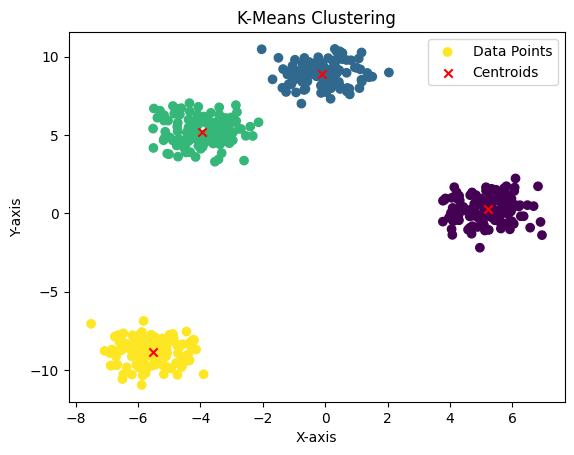

In [6]:
k =4
kmeans = KMeans_class(n_clusters=k)
kmeans.fit(x)


# Plot the data points and centroids
plt.scatter(df_blobs['x1'], df_blobs['x2'], c=kmeans.labels, cmap='viridis', label='Data Points')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

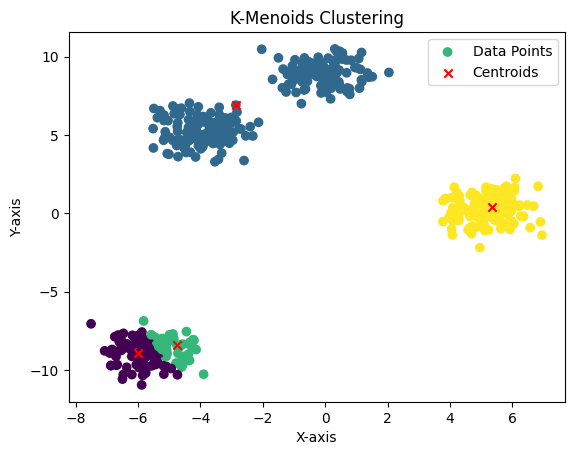

In [7]:
k =4
kmeoids = KMeoids_class(n_clusters=k)
kmeoids.fit(x)


# Plot the data points and centroids
plt.scatter(df_blobs['x1'], df_blobs['x2'], c=kmeoids.labels, cmap='viridis', label='Data Points')
plt.scatter(kmeoids.centroids[:, 0], kmeoids.centroids[:, 1], c='red', marker='x', label='Centroids')
plt.legend()
plt.title('K-Menoids Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

As you can see, the python packages we have created for kmeans and kmedoids are working properly.

# Exercise 5

Let’s use the newly created modules in unsupervised to cluster some toy data:

In [8]:
X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,center_box=(-10.0,10.0),shuffle=True, random_state=1)

Plotting the dataset

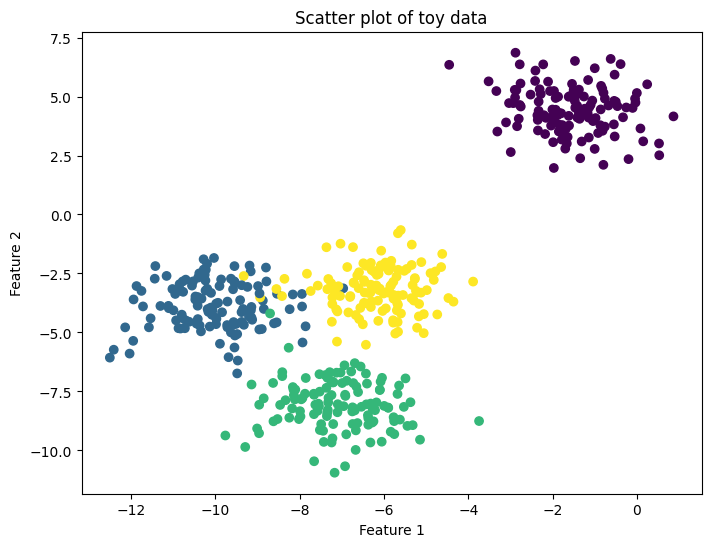

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Scatter plot of toy data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

According to the image above, I would say that there is 2 different clusters. The yellow, blue and green ones are one single cluster because they are very close to each other. On the other hand, purple representation is way far of the cluster with the yellow, blue and green representation.

Before to proceed to calculate the silhouette plots and coefficients for each run,it is important to establish that it is not possible to iterate the number of clusters K from 1 to 5 clusters. Sillouette score needs at least 2 clusters to be calculated, so we will start from 2 to 6 clusters. Otherwise, we will get the following error: *ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive) Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...*

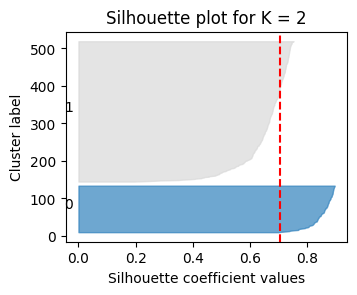

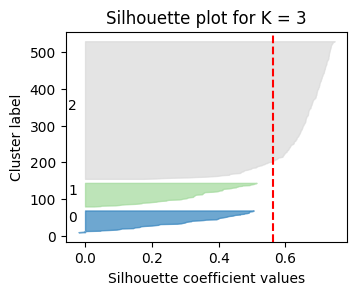

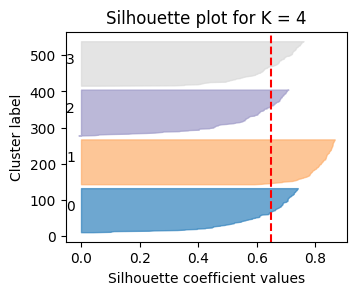

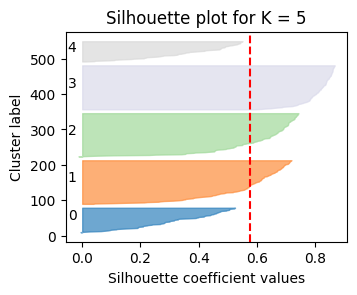

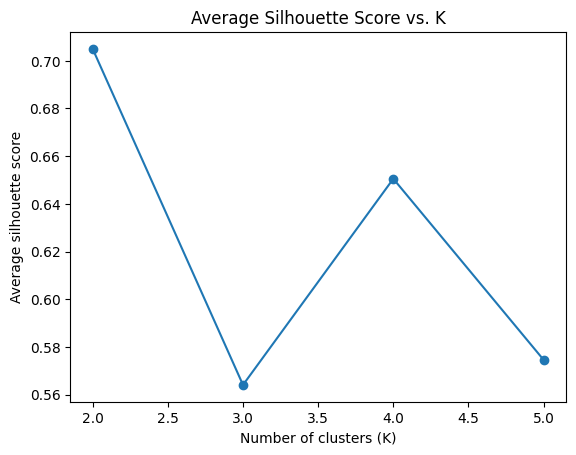

In [10]:
# Create a list to store silhouette scores for each K
silhouette_scores_kmeans = []

# Iterate through K values from 2 to 5
for k in range(2, 6):
    # Create a KMeans instance with 'k' clusters
    kmeans = KMeans_class(n_clusters=k)
    labels = kmeans.fit_predict(X)

    # Calculate silhouette scores for each sample
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores_kmeans.append(silhouette_avg)

    # Calculate silhouette values for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    # Create a subplot for the silhouette plot
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 2, k - 1)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.tab20c(float(i) / (k-1))
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    
    # Add a vertical line for the mean silhouette score
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    plt.title(f"Silhouette plot for K = {k}")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

# Show the overall silhouette scores plot
plt.figure()
plt.plot(range(2, 6), silhouette_scores_kmeans, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Average silhouette score")
plt.title("Average Silhouette Score vs. K")
plt.show()


Let's proceed in the same way for kmeoids method:

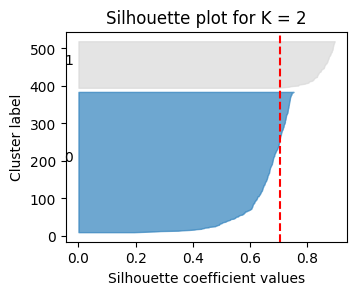

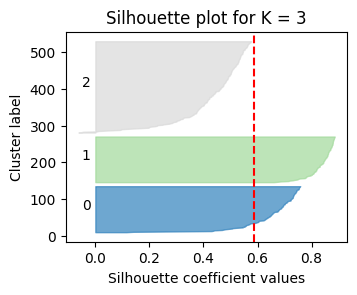

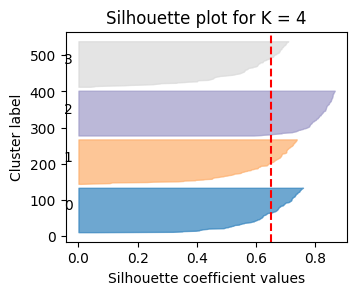

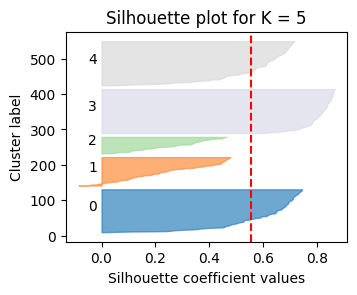

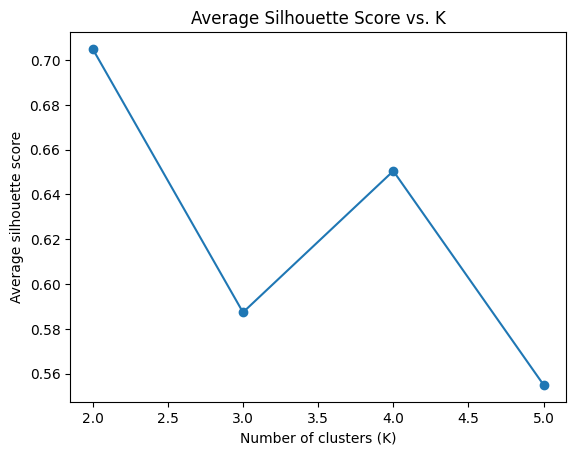

In [11]:
# Create a list to store silhouette scores for each K
silhouette_scores_kmeoids = []

# Iterate through K values from 2 to 5
for k in range(2, 6):
    # Create a KMeoids instance with 'k' clusters
    kmeoids = KMeoids_class(n_clusters=k)
    labels = kmeoids.fit_predict(X)

    # Calculate silhouette scores for each sample
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores_kmeoids.append(silhouette_avg)

    # Calculate silhouette values for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    # Create a subplot for the silhouette plot
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 2, k - 1)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.tab20c(float(i) / (k-1))
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    
    # Add a vertical line for the mean silhouette score
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    plt.title(f"Silhouette plot for K = {k}")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

# Show the overall silhouette scores plot
plt.figure()
plt.plot(range(2, 6), silhouette_scores_kmeoids, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Average silhouette score")
plt.title("Average Silhouette Score vs. K")
plt.show()

According to the results for kmeans and kmeoids methods, the best number of clusters is 2. This is because the greater the Average Silhouette Score, the better the clustering. Thanks to this result, we can confirm that the guessed number of clusters when we graphed the data points for the first time was correct.

# Exercise 6

In [12]:
#============
#Generate data sets.We choose the size big enough to see the scalability 
#of the algorithms, but not too big to avoid too long running times
#============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5,noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

#Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

#blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,cluster_std=[1.0, 2.5, 0.5],random_state=random_state)


Let's plot the different datasets first:

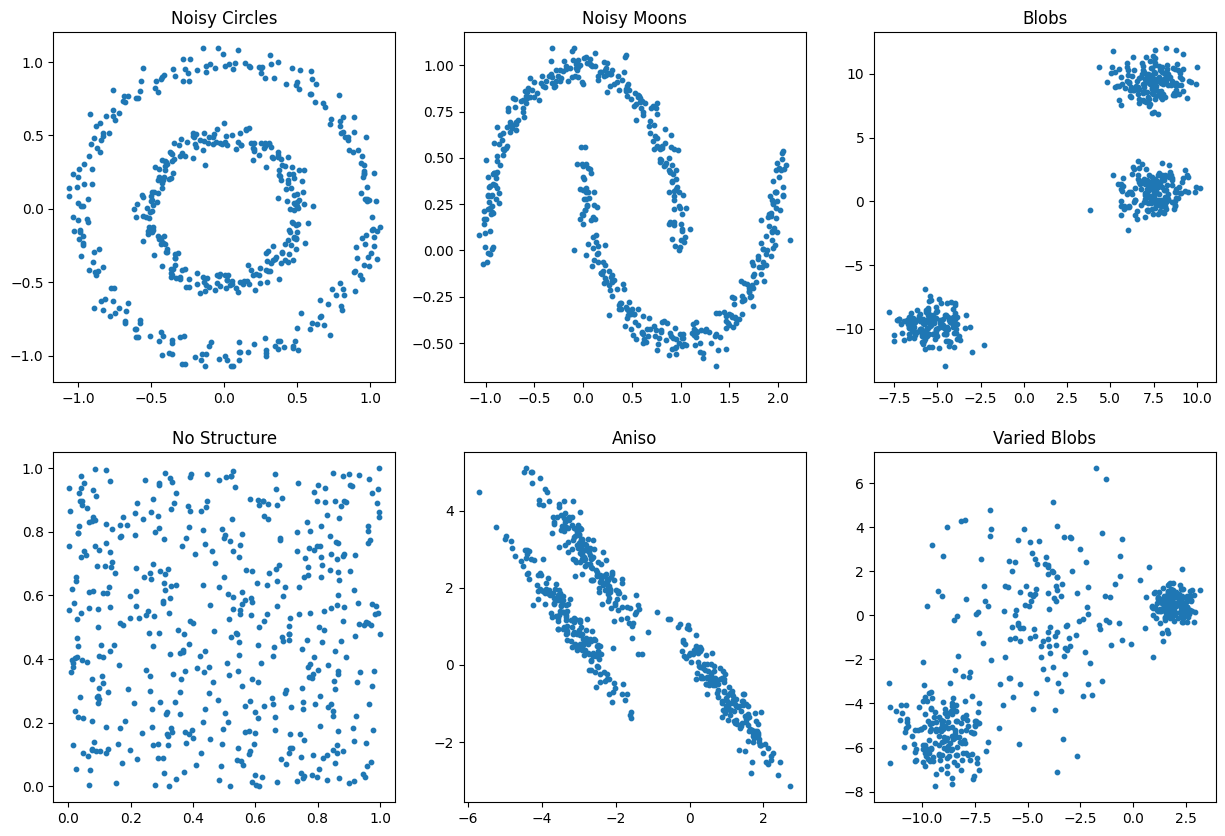

In [13]:
# Plot the datasets
datasets_to_plot = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
dataset_names = ["Noisy Circles", "Noisy Moons", "Blobs", "No Structure", "Aniso", "Varied Blobs"]

plt.figure(figsize=(15, 10))
for i, dataset in enumerate(datasets_to_plot):
    X, _ = dataset
    plt.subplot(2, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.title(dataset_names[i])

plt.show()


We can say about this graphs that we have a variety of distributions that will be well classified in different labels only for a certain model. For example, KMeans and KMeoids will be suitable for "Blobs" plot because the data is distributed in an spherical manner. DBSCAN will be just right for "Noisy Moons" and "Noisy circles", and Spectral Clustering will be suitable for "Aniso" and "Varied Blobs". Let's see if our guesses are correct:

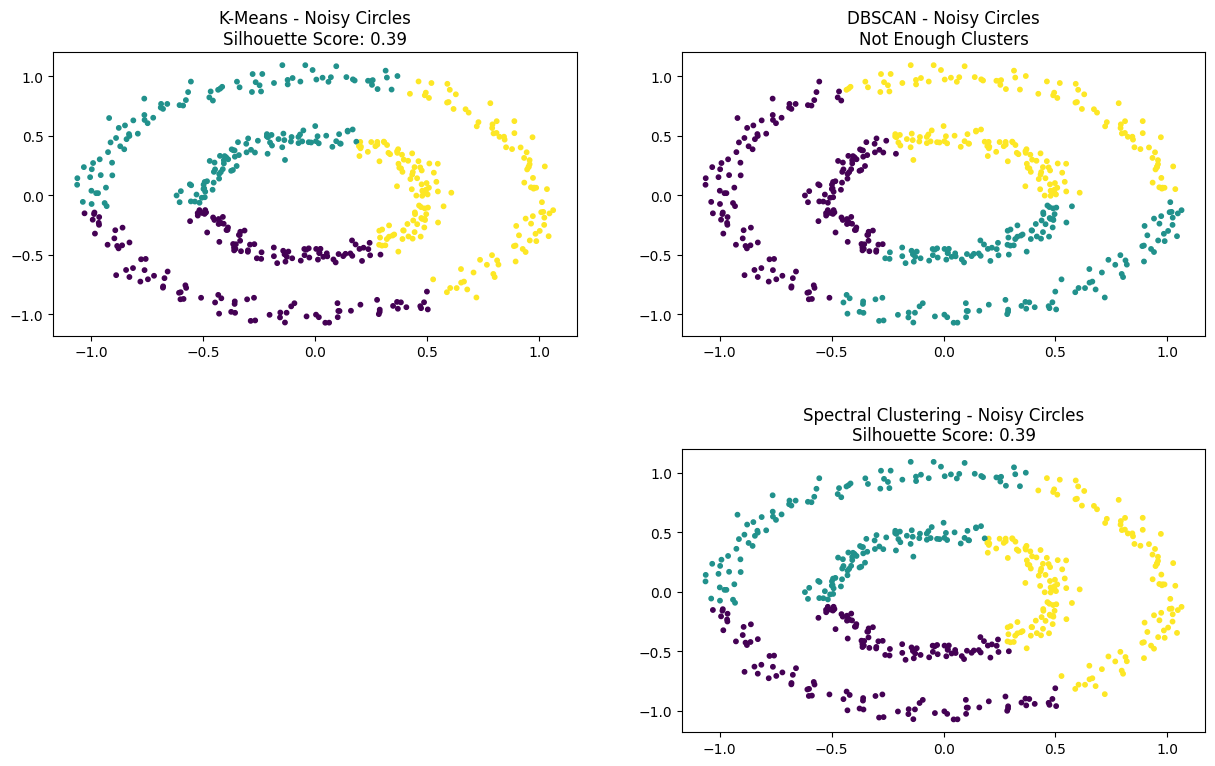

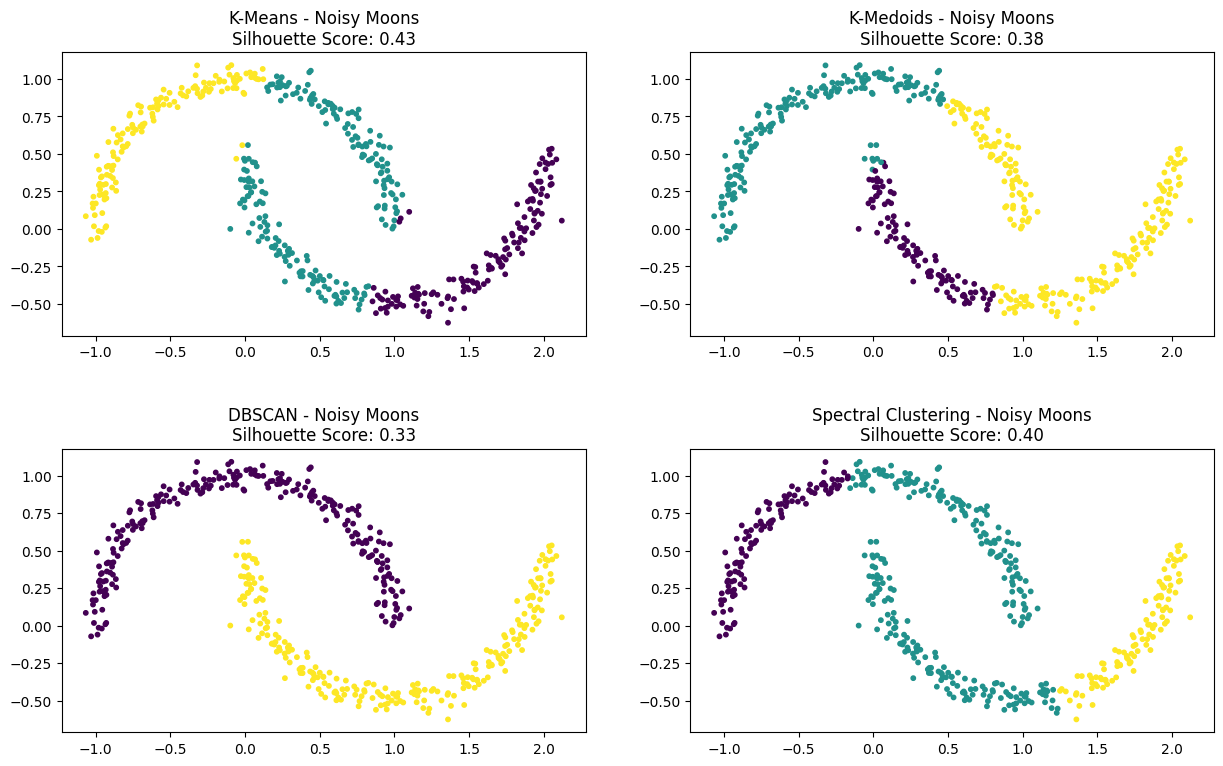

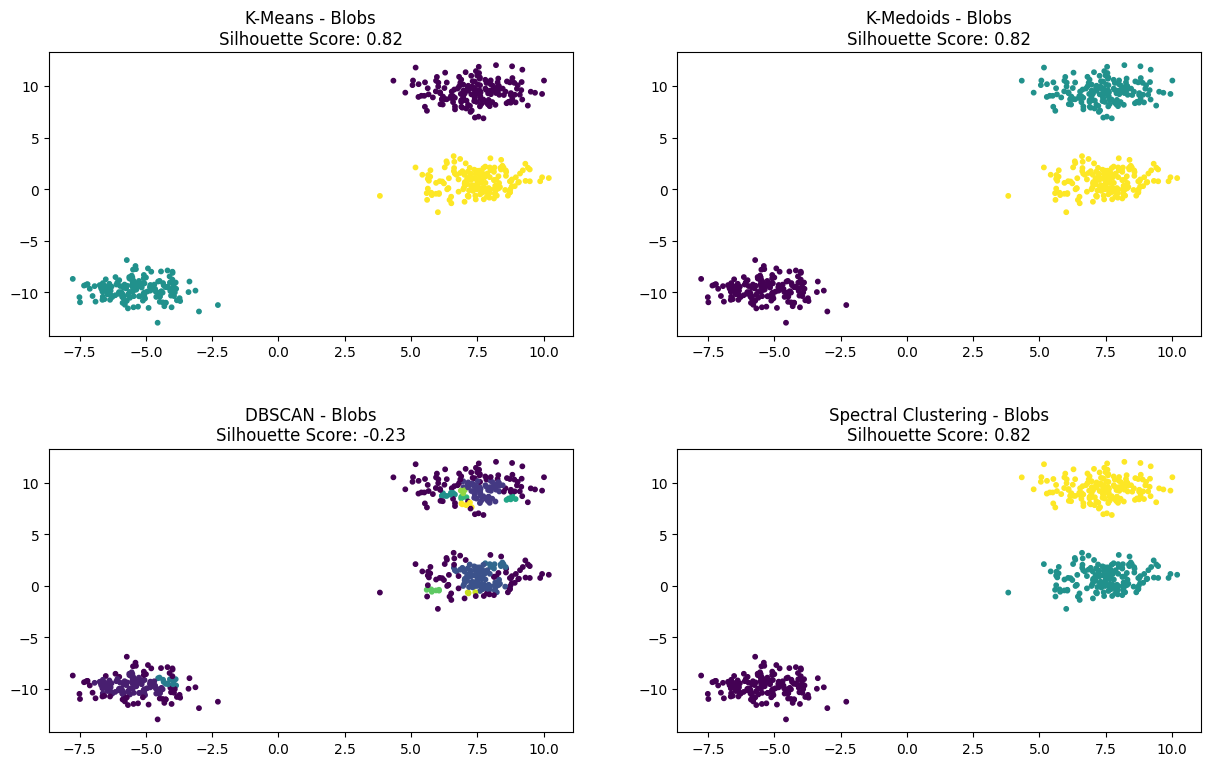

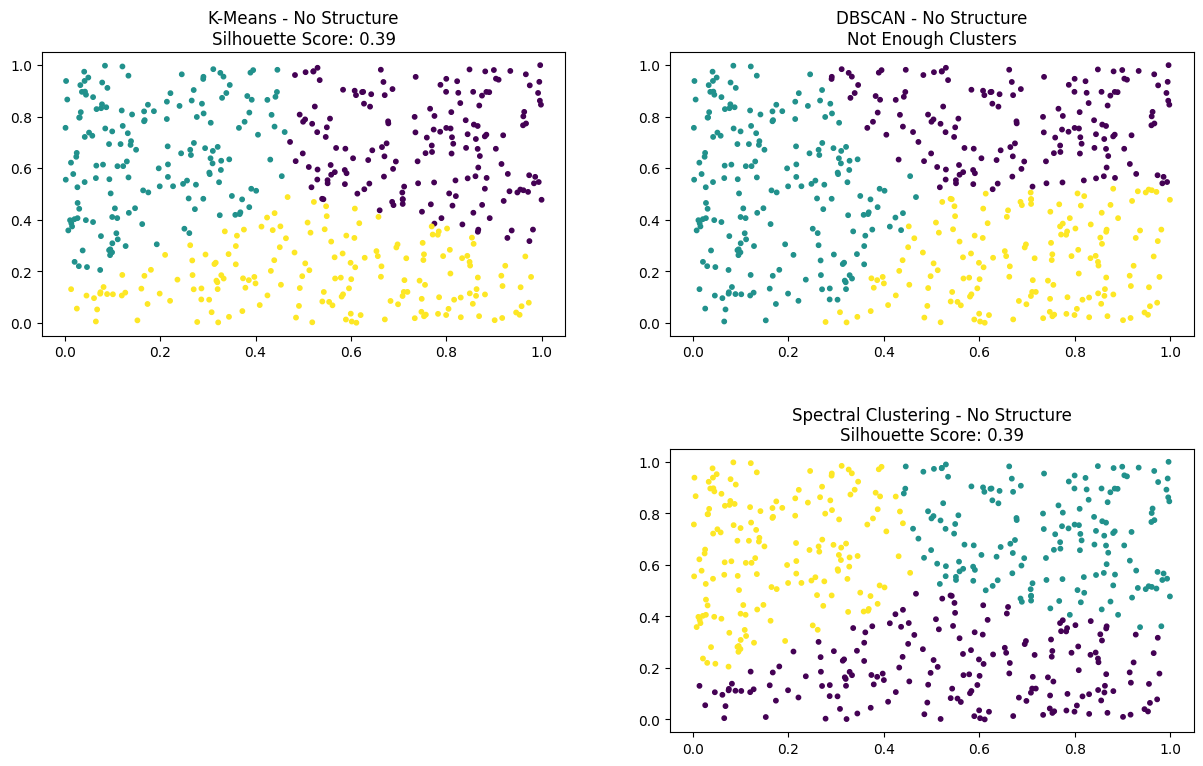

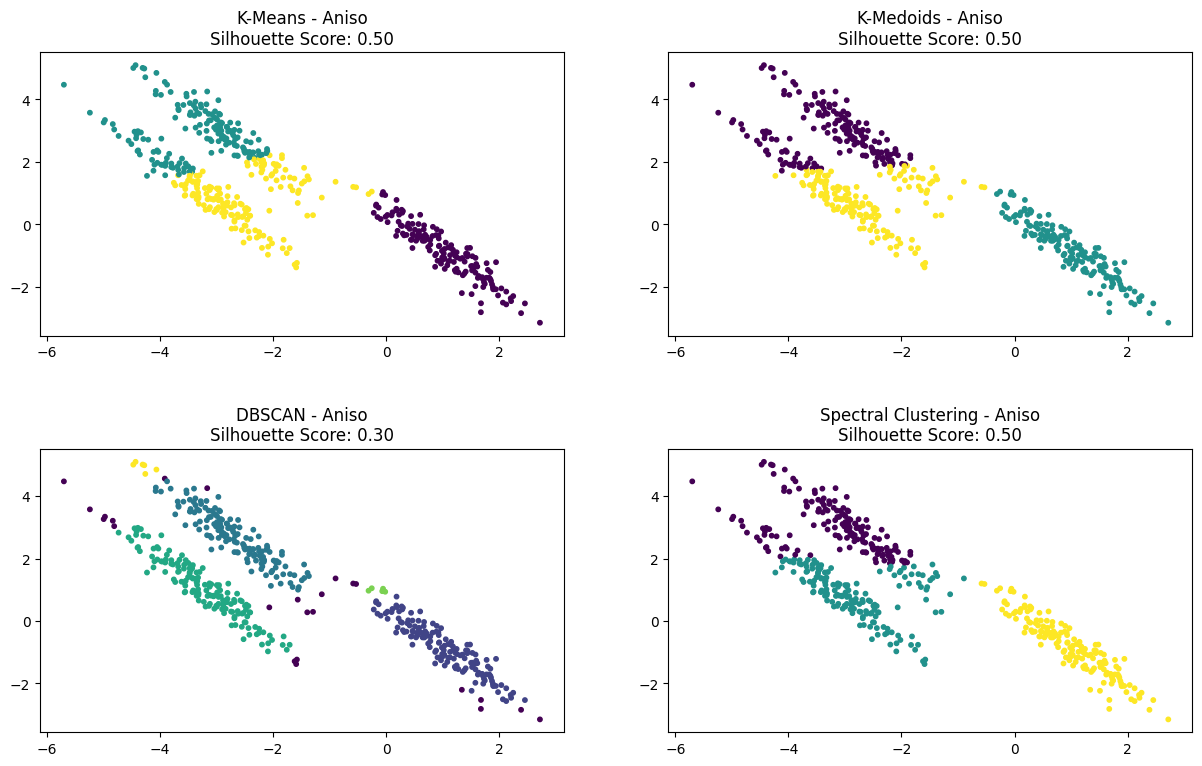

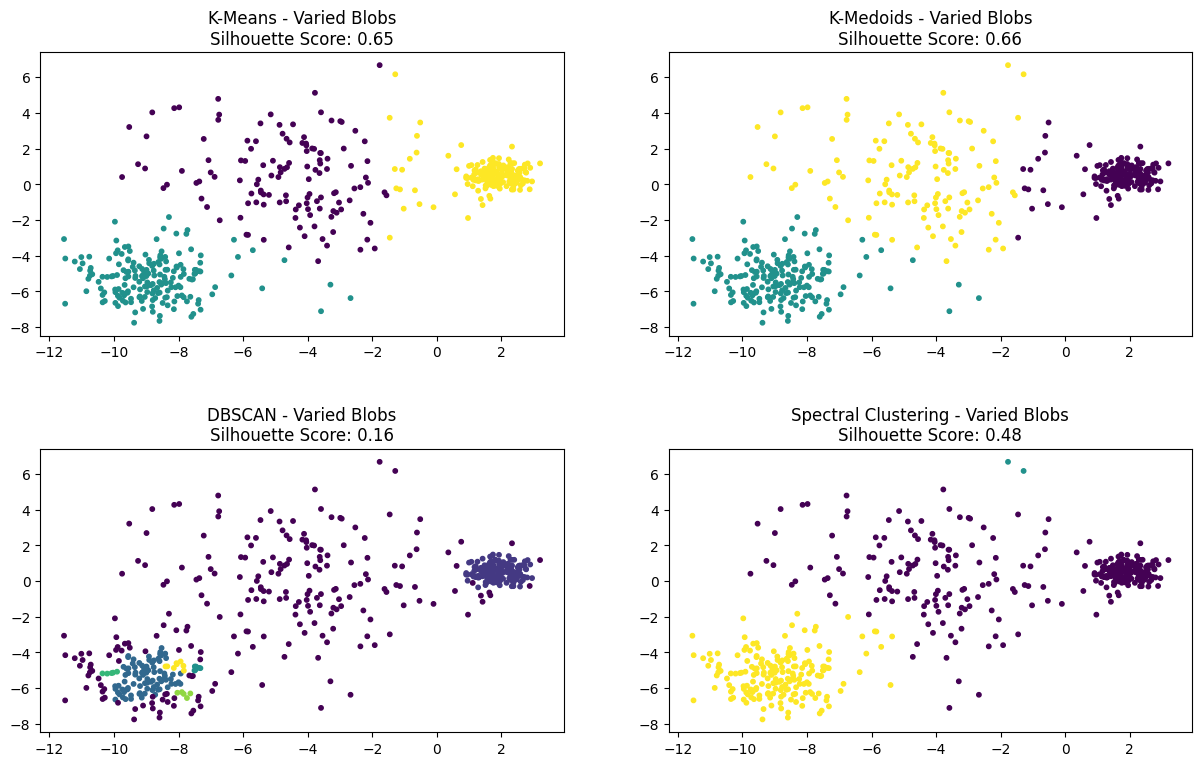

In [14]:
# Define the clustering algorithms
clustering_algorithms = [
    ("K-Means", KMeans(n_clusters=3, n_init=10, random_state=0)),  # Added random_state for reproducibility
    ("K-Medoids", KMedoids(n_clusters=3, random_state=0)),
    ("DBSCAN", DBSCAN(eps=0.3, min_samples=5)),
    ("Spectral Clustering", SpectralClustering(n_clusters=3, eigen_solver='arpack'))
]

# Iterate through datasets and algorithms
for dataset, dataset_name in zip(datasets_to_plot, dataset_names):
    X, _ = dataset
    
    plt.figure(figsize=(12, 8))
    plt.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9, wspace=0.2, hspace=0.4)

    for i_algorithm, (name, algorithm) in enumerate(clustering_algorithms):
        # Fit the algorithm to the data
        algorithm.fit(X)
        
        # Get cluster labels
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)
        
        if len(np.unique(y_pred)) < 2:
            # If there's only one cluster, skip Silhouette Score calculation
            plt.title(f"{name} - {dataset_name}\nNot Enough Clusters")
        else:
            # Calculate Silhouette Score
            silhouette_avg = silhouette_score(X, y_pred)
            
            # Plot the results with the Silhouette Score in the title
            plt.subplot(2, 2, i_algorithm + 1)
            plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=10)
            plt.title(f"{name} - {dataset_name}\nSilhouette Score: {silhouette_avg:.2f}")
    
    plt.show()


As you can see on the results above, there is two scenarios where kmedoids algorithm did not allow to plot the final result. This is because the algorithm did not converge and this was because this algorithm is quite sensitive to outliers and noise in the dataset. If you take a look to the images where there is an empty space, you will notice that these scenarios deals with noise (like in the noisy circles data set) and there is another that deals with unstructured data (such as the No structure dataset)

Additionally, there is some plots that you can read that there is no enough clusters. This is because in order to calculate the Silouette score, we need at least 2 clusters. Therefore some plots has no Silhouette Score. This is the case of the "Noisy circles" and "No structure" datasets.

**Analysis for Noisy circles dataset**

As you can see in the image above, both KMeans and Spectral Clustering lead to the same Silhouette Score, while DBSCAN could not calculate it because it needs at least 2 clusters to calculate it. In this case, we can say that KMeans and Spectral Clustering are the best algorithms to cluster this dataset. However, if you take a look at the graphical results, we would say that no model correctly performed the classification. We conclude this based on the fact that  we are supposed to have two different circles, so we should have two different clusters. However, the models have classified the data in three different clusters.

**Analysis for Noisy moons dataset**

Every model has performed the classification and this is why Silhouette Score has been calculated for all of them. As you can see on the image above, KMeans was the model with the best Silhoutte Score, so you may think that this is the best model for this kind of datasets. However, we decide to choose DBSCAN as the best model for this dataset because it is the only one that has correctly represent the two separed moons.

**Analysis for Blobs dataset**

In this case were KMeans, KMedoids and Spectral Clustering the models with the best performances. We guessed the result for KMeans and KMedoids correctly because of the espherical representation of the data. However, we learned that Spectral Clustering is also suitable for this kind of datasets. This is because Spectral Clustering is a technique used for clustering data points into groups or clusters based on their similarity.

**Analysis for no structure dataset**

This is the other scenario where KMedoids did not converge. Additionally, DBSCAN did not achive the minimum number of clusters to calculate the Silhouette Score either. Therefore, if we had to choose one model to perform clustering over this dataset, it should be either KMeans or Spectral clustering.

**Analysis of aniso dataset**

We would say that no model perfomed a good clustering because Silhouette Score is only 0.5 for three of the four models, and the other model achieved even a smaller value. We would like to conclude based on this result that an anisotropic dataset is not compatible with these clustering algorithms. 

**Analysis of varied variance blobs dataset**

As you can see on the image above, KMeans and Kmedoids algorithms were the ones with the best results, the achieved a very similar Silhouette Score. On the other hand, DBSCAN did not perform quite well with this dataset. In fact, it is suggesting some slag clusters in yellow and two in green. Finally, Spectral Clustering did not perform well either. This is because this algorithm is suitable for datasets with complex cluster shapes, and this is not the case of this dataset.